In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt



In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match EfficientNet input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define the directory path
data_dir = r"D:\archive (1)\PlantVillage"

# Load the entire dataset
full_dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Define the sizes of each split
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

# Split the dataset into training, validation, and testing sets
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])

# Create data loaders for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Print class names
print(full_dataset.classes)

# Custom EfficientNet-like model definition
class CustomEfficientNet(nn.Module):
    def __init__(self, num_classes=15, in_channels=3, dropout_rate=0.2):
        super(CustomEfficientNet, self).__init__()

        # Stem convolutional layer
        self.stem = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True)
        )

        # Blocks (similar to EfficientNet's design)
        self.blocks = nn.Sequential(
            EfficientBlock(32, 16, 1, 1, dropout_rate),
            EfficientBlock(16, 24, 2, 2, dropout_rate),
            EfficientBlock(24, 40, 2, 2, dropout_rate),
            EfficientBlock(40, 80, 3, 2, dropout_rate),
            EfficientBlock(80, 112, 3, 1, dropout_rate),
            EfficientBlock(112, 192, 4, 2, dropout_rate),
            EfficientBlock(192, 320, 1, 1, dropout_rate)
        )

        # Classifier head
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(dropout_rate),
            nn.Linear(320, num_classes)
        )

    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        x = self.classifier(x)
        return x


class EfficientBlock(nn.Module):
    def __init__(self, in_channels, out_channels, num_layers, stride, dropout_rate):
        super(EfficientBlock, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1))
            layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.ReLU(inplace=True))
            in_channels = out_channels
        
        layers.append(nn.Dropout(dropout_rate))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)


# Print the model architecture
model = CustomEfficientNet(num_classes=15).to(device)
print(model)


['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
CustomEfficientNet(
  (stem): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (blocks): Sequential(
    (0): EfficientBlock(
      (block): Sequential(
        (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Dropout(p=0.2, inplace=False)
      )
    )
    (1): Efficient


Training with learning rate: 0.001


Epoch [1/50], Train Loss: 2.0474, Train Accuracy: 0.3265, Val Loss: 1.5016, Val Accuracy: 0.5119


Epoch [2/50], Train Loss: 1.3427, Train Accuracy: 0.5686, Val Loss: 1.0882, Val Accuracy: 0.6554


Epoch [3/50], Train Loss: 1.0097, Train Accuracy: 0.6832, Val Loss: 1.0902, Val Accuracy: 0.6898


Epoch [4/50], Train Loss: 0.7895, Train Accuracy: 0.7532, Val Loss: 0.5935, Val Accuracy: 0.8076


Epoch [5/50], Train Loss: 0.6543, Train Accuracy: 0.8010, Val Loss: 0.4920, Val Accuracy: 0.8434


Epoch [6/50], Train Loss: 0.5543, Train Accuracy: 0.8280, Val Loss: 0.5571, Val Accuracy: 0.8163


Epoch [7/50], Train Loss: 0.5074, Train Accuracy: 0.8451, Val Loss: 0.6497, Val Accuracy: 0.7945


Epoch [8/50], Train Loss: 0.4713, Train Accuracy: 0.8575, Val Loss: 0.3933, Val Accuracy: 0.8657


Epoch [9/50], Train Loss: 0.4115, Train Accuracy: 0.8757, Val Loss: 0.4353, Val Accuracy: 0.8715


Epoch [10/50], Train Loss: 0.3882, Train Accuracy: 0.8838, Val Loss: 0.3482, Val Accuracy: 0.8885


Epoch [11/50], Train Loss: 0.3552, Train Accuracy: 0.8952, Val Loss: 0.4002, Val Accuracy: 0.8623


Epoch [12/50], Train Loss: 0.3192, Train Accuracy: 0.9047, Val Loss: 0.2791, Val Accuracy: 0.9103


Epoch [13/50], Train Loss: 0.2969, Train Accuracy: 0.9120, Val Loss: 0.3690, Val Accuracy: 0.8846


Epoch [14/50], Train Loss: 0.2806, Train Accuracy: 0.9186, Val Loss: 0.3867, Val Accuracy: 0.8841


Epoch [15/50], Train Loss: 0.2674, Train Accuracy: 0.9224, Val Loss: 0.2761, Val Accuracy: 0.9113


Epoch [16/50], Train Loss: 0.2603, Train Accuracy: 0.9227, Val Loss: 0.2267, Val Accuracy: 0.9287


Epoch [17/50], Train Loss: 0.2386, Train Accuracy: 0.9295, Val Loss: 0.2486, Val Accuracy: 0.9292


Epoch [18/50], Train Loss: 0.2359, Train Accuracy: 0.9319, Val Loss: 0.2439, Val Accuracy: 0.9268


Epoch [19/50], Train Loss: 0.2109, Train Accuracy: 0.9405, Val Loss: 0.1909, Val Accuracy: 0.9360


Epoch [20/50], Train Loss: 0.2077, Train Accuracy: 0.9399, Val Loss: 0.3187, Val Accuracy: 0.9031


Epoch [21/50], Train Loss: 0.2049, Train Accuracy: 0.9403, Val Loss: 0.2779, Val Accuracy: 0.9098


Epoch [22/50], Train Loss: 0.1951, Train Accuracy: 0.9441, Val Loss: 0.1792, Val Accuracy: 0.9413


Epoch [23/50], Train Loss: 0.1771, Train Accuracy: 0.9500, Val Loss: 0.2767, Val Accuracy: 0.9127


Epoch [24/50], Train Loss: 0.1785, Train Accuracy: 0.9472, Val Loss: 0.2086, Val Accuracy: 0.9321


Epoch [25/50], Train Loss: 0.1671, Train Accuracy: 0.9518, Val Loss: 0.1937, Val Accuracy: 0.9409


Epoch [26/50], Train Loss: 0.1502, Train Accuracy: 0.9565, Val Loss: 0.1705, Val Accuracy: 0.9472


Epoch [27/50], Train Loss: 0.1362, Train Accuracy: 0.9605, Val Loss: 0.3807, Val Accuracy: 0.8968


Epoch [28/50], Train Loss: 0.1565, Train Accuracy: 0.9546, Val Loss: 0.2131, Val Accuracy: 0.9365


Epoch [29/50], Train Loss: 0.1364, Train Accuracy: 0.9618, Val Loss: 0.2235, Val Accuracy: 0.9360


Epoch [30/50], Train Loss: 0.1327, Train Accuracy: 0.9619, Val Loss: 0.2029, Val Accuracy: 0.9399


Epoch [31/50], Train Loss: 0.1349, Train Accuracy: 0.9630, Val Loss: 0.1469, Val Accuracy: 0.9525


Epoch [32/50], Train Loss: 0.1327, Train Accuracy: 0.9624, Val Loss: 0.1711, Val Accuracy: 0.9501


Epoch [33/50], Train Loss: 0.1135, Train Accuracy: 0.9687, Val Loss: 0.1862, Val Accuracy: 0.9389


Epoch [34/50], Train Loss: 0.1213, Train Accuracy: 0.9668, Val Loss: 0.2241, Val Accuracy: 0.9336


Epoch [35/50], Train Loss: 0.1209, Train Accuracy: 0.9671, Val Loss: 0.1590, Val Accuracy: 0.9530


Epoch [36/50], Train Loss: 0.1128, Train Accuracy: 0.9686, Val Loss: 0.1270, Val Accuracy: 0.9569


Epoch [37/50], Train Loss: 0.1260, Train Accuracy: 0.9663, Val Loss: 0.2584, Val Accuracy: 0.9355


Epoch [38/50], Train Loss: 0.1160, Train Accuracy: 0.9681, Val Loss: 0.1512, Val Accuracy: 0.9549


Epoch [39/50], Train Loss: 0.1006, Train Accuracy: 0.9721, Val Loss: 0.1333, Val Accuracy: 0.9593


Epoch [40/50], Train Loss: 0.1061, Train Accuracy: 0.9698, Val Loss: 0.1362, Val Accuracy: 0.9607


Epoch [41/50], Train Loss: 0.1131, Train Accuracy: 0.9666, Val Loss: 0.1444, Val Accuracy: 0.9564


Epoch [42/50], Train Loss: 0.0895, Train Accuracy: 0.9745, Val Loss: 0.1857, Val Accuracy: 0.9447


Epoch [43/50], Train Loss: 0.0869, Train Accuracy: 0.9760, Val Loss: 0.1257, Val Accuracy: 0.9641


Epoch [44/50], Train Loss: 0.0939, Train Accuracy: 0.9743, Val Loss: 0.2278, Val Accuracy: 0.9467


Epoch [45/50], Train Loss: 0.0979, Train Accuracy: 0.9727, Val Loss: 0.1551, Val Accuracy: 0.9564


Epoch [46/50], Train Loss: 0.0912, Train Accuracy: 0.9742, Val Loss: 0.1951, Val Accuracy: 0.9447


Epoch [47/50], Train Loss: 0.0824, Train Accuracy: 0.9769, Val Loss: 0.1299, Val Accuracy: 0.9632


Epoch [48/50], Train Loss: 0.0977, Train Accuracy: 0.9729, Val Loss: 0.1734, Val Accuracy: 0.9486


Epoch [49/50], Train Loss: 0.0918, Train Accuracy: 0.9743, Val Loss: 0.1235, Val Accuracy: 0.9656


Epoch [50/50], Train Loss: 0.0791, Train Accuracy: 0.9779, Val Loss: 0.1366, Val Accuracy: 0.9627
Test Loss: 0.1184, Test Accuracy: 0.9646

Training with learning rate: 0.0001


Epoch [1/50], Train Loss: 2.6381, Train Accuracy: 0.1345, Val Loss: 2.5600, Val Accuracy: 0.1580


Epoch [2/50], Train Loss: 2.3988, Train Accuracy: 0.2166, Val Loss: 2.4377, Val Accuracy: 0.2109


Epoch [3/50], Train Loss: 2.1815, Train Accuracy: 0.3002, Val Loss: 2.2653, Val Accuracy: 0.2574


Epoch [4/50], Train Loss: 1.9326, Train Accuracy: 0.3933, Val Loss: 1.9294, Val Accuracy: 0.3921


Epoch [5/50], Train Loss: 1.7098, Train Accuracy: 0.4625, Val Loss: 1.7888, Val Accuracy: 0.4363


Epoch [6/50], Train Loss: 1.5486, Train Accuracy: 0.5103, Val Loss: 1.4488, Val Accuracy: 0.5322


Epoch [7/50], Train Loss: 1.4209, Train Accuracy: 0.5431, Val Loss: 1.3367, Val Accuracy: 0.5691


Epoch [8/50], Train Loss: 1.3016, Train Accuracy: 0.5829, Val Loss: 1.1864, Val Accuracy: 0.6132


Epoch [9/50], Train Loss: 1.1960, Train Accuracy: 0.6147, Val Loss: 1.0267, Val Accuracy: 0.6626


Epoch [10/50], Train Loss: 1.1218, Train Accuracy: 0.6377, Val Loss: 1.0460, Val Accuracy: 0.6573


Epoch [11/50], Train Loss: 1.0705, Train Accuracy: 0.6585, Val Loss: 0.9340, Val Accuracy: 0.6878


Epoch [12/50], Train Loss: 1.0113, Train Accuracy: 0.6758, Val Loss: 0.8592, Val Accuracy: 0.7082


Epoch [13/50], Train Loss: 0.9619, Train Accuracy: 0.6891, Val Loss: 0.8420, Val Accuracy: 0.7261


Epoch [14/50], Train Loss: 0.8941, Train Accuracy: 0.7147, Val Loss: 0.7018, Val Accuracy: 0.7591


Epoch [15/50], Train Loss: 0.8527, Train Accuracy: 0.7296, Val Loss: 0.7660, Val Accuracy: 0.7450


Epoch [16/50], Train Loss: 0.7877, Train Accuracy: 0.7501, Val Loss: 0.5928, Val Accuracy: 0.8080


Epoch [17/50], Train Loss: 0.7353, Train Accuracy: 0.7694, Val Loss: 0.5692, Val Accuracy: 0.8173


Epoch [18/50], Train Loss: 0.6834, Train Accuracy: 0.7836, Val Loss: 0.4902, Val Accuracy: 0.8459


Epoch [19/50], Train Loss: 0.6370, Train Accuracy: 0.7988, Val Loss: 0.4956, Val Accuracy: 0.8468


Epoch [20/50], Train Loss: 0.6070, Train Accuracy: 0.8090, Val Loss: 0.4787, Val Accuracy: 0.8473


Epoch [21/50], Train Loss: 0.5757, Train Accuracy: 0.8165, Val Loss: 0.4826, Val Accuracy: 0.8400


Epoch [22/50], Train Loss: 0.5440, Train Accuracy: 0.8269, Val Loss: 0.4091, Val Accuracy: 0.8740


Epoch [23/50], Train Loss: 0.5098, Train Accuracy: 0.8382, Val Loss: 0.3676, Val Accuracy: 0.8837


Epoch [24/50], Train Loss: 0.4904, Train Accuracy: 0.8448, Val Loss: 0.4443, Val Accuracy: 0.8551


Epoch [25/50], Train Loss: 0.4794, Train Accuracy: 0.8494, Val Loss: 0.3548, Val Accuracy: 0.8808


Epoch [26/50], Train Loss: 0.4446, Train Accuracy: 0.8595, Val Loss: 0.3633, Val Accuracy: 0.8778


Epoch [27/50], Train Loss: 0.4275, Train Accuracy: 0.8640, Val Loss: 0.4100, Val Accuracy: 0.8619


Epoch [28/50], Train Loss: 0.4133, Train Accuracy: 0.8702, Val Loss: 0.3777, Val Accuracy: 0.8720


Epoch [29/50], Train Loss: 0.3854, Train Accuracy: 0.8776, Val Loss: 0.3562, Val Accuracy: 0.8778


Epoch [30/50], Train Loss: 0.3772, Train Accuracy: 0.8823, Val Loss: 0.3539, Val Accuracy: 0.8817


Epoch [31/50], Train Loss: 0.3592, Train Accuracy: 0.8864, Val Loss: 0.3270, Val Accuracy: 0.8885


Epoch [32/50], Train Loss: 0.3415, Train Accuracy: 0.8920, Val Loss: 0.2926, Val Accuracy: 0.9055


Epoch [33/50], Train Loss: 0.3271, Train Accuracy: 0.8974, Val Loss: 0.3073, Val Accuracy: 0.8977


Epoch [34/50], Train Loss: 0.3269, Train Accuracy: 0.8987, Val Loss: 0.2669, Val Accuracy: 0.9142


Epoch [35/50], Train Loss: 0.3074, Train Accuracy: 0.9018, Val Loss: 0.2488, Val Accuracy: 0.9190


Epoch [36/50], Train Loss: 0.3032, Train Accuracy: 0.9044, Val Loss: 0.2454, Val Accuracy: 0.9181


Epoch [37/50], Train Loss: 0.2875, Train Accuracy: 0.9089, Val Loss: 0.2708, Val Accuracy: 0.9050


Epoch [38/50], Train Loss: 0.2710, Train Accuracy: 0.9146, Val Loss: 0.2406, Val Accuracy: 0.9195


Epoch [39/50], Train Loss: 0.2632, Train Accuracy: 0.9156, Val Loss: 0.2530, Val Accuracy: 0.9147


Epoch [40/50], Train Loss: 0.2520, Train Accuracy: 0.9216, Val Loss: 0.2261, Val Accuracy: 0.9287


Epoch [41/50], Train Loss: 0.2541, Train Accuracy: 0.9196, Val Loss: 0.2611, Val Accuracy: 0.9171


Epoch [42/50], Train Loss: 0.2400, Train Accuracy: 0.9228, Val Loss: 0.2171, Val Accuracy: 0.9249


Epoch [43/50], Train Loss: 0.2254, Train Accuracy: 0.9299, Val Loss: 0.2149, Val Accuracy: 0.9292


Epoch [44/50], Train Loss: 0.2178, Train Accuracy: 0.9319, Val Loss: 0.2237, Val Accuracy: 0.9239


Epoch [45/50], Train Loss: 0.2109, Train Accuracy: 0.9347, Val Loss: 0.2639, Val Accuracy: 0.9181


Epoch [46/50], Train Loss: 0.2130, Train Accuracy: 0.9324, Val Loss: 0.2140, Val Accuracy: 0.9307


Epoch [47/50], Train Loss: 0.2084, Train Accuracy: 0.9326, Val Loss: 0.2122, Val Accuracy: 0.9326


Epoch [48/50], Train Loss: 0.2035, Train Accuracy: 0.9376, Val Loss: 0.2268, Val Accuracy: 0.9278


Epoch [49/50], Train Loss: 0.1960, Train Accuracy: 0.9387, Val Loss: 0.2587, Val Accuracy: 0.9234


Epoch [50/50], Train Loss: 0.1990, Train Accuracy: 0.9370, Val Loss: 0.1944, Val Accuracy: 0.9394
Test Loss: 0.1611, Test Accuracy: 0.9487

Training with learning rate: 1e-05


Epoch [1/50], Train Loss: 2.8192, Train Accuracy: 0.0690, Val Loss: 2.6824, Val Accuracy: 0.0984


Epoch [2/50], Train Loss: 2.7487, Train Accuracy: 0.0879, Val Loss: 2.6482, Val Accuracy: 0.1178


Epoch [3/50], Train Loss: 2.7169, Train Accuracy: 0.1016, Val Loss: 2.6205, Val Accuracy: 0.1241


Epoch [4/50], Train Loss: 2.6779, Train Accuracy: 0.1148, Val Loss: 2.6058, Val Accuracy: 0.1222


Epoch [5/50], Train Loss: 2.6404, Train Accuracy: 0.1267, Val Loss: 2.5981, Val Accuracy: 0.1299


Epoch [6/50], Train Loss: 2.6227, Train Accuracy: 0.1314, Val Loss: 2.5988, Val Accuracy: 0.1333


Epoch [7/50], Train Loss: 2.6002, Train Accuracy: 0.1419, Val Loss: 2.6007, Val Accuracy: 0.1401


Epoch [8/50], Train Loss: 2.5625, Train Accuracy: 0.1508, Val Loss: 2.6063, Val Accuracy: 0.1391


Epoch [9/50], Train Loss: 2.5457, Train Accuracy: 0.1589, Val Loss: 2.6203, Val Accuracy: 0.1478


Epoch [10/50], Train Loss: 2.5291, Train Accuracy: 0.1638, Val Loss: 2.6387, Val Accuracy: 0.1503


Epoch [11/50], Train Loss: 2.5035, Train Accuracy: 0.1686, Val Loss: 2.6612, Val Accuracy: 0.1415


Epoch [12/50], Train Loss: 2.4819, Train Accuracy: 0.1711, Val Loss: 2.6808, Val Accuracy: 0.1454


Epoch [13/50], Train Loss: 2.4602, Train Accuracy: 0.1806, Val Loss: 2.7173, Val Accuracy: 0.1469


Epoch [14/50], Train Loss: 2.4386, Train Accuracy: 0.1864, Val Loss: 2.7341, Val Accuracy: 0.1503


Epoch [15/50], Train Loss: 2.4233, Train Accuracy: 0.1864, Val Loss: 2.7664, Val Accuracy: 0.1508


Epoch [16/50], Train Loss: 2.4025, Train Accuracy: 0.1924, Val Loss: 2.7672, Val Accuracy: 0.1512


Epoch [17/50], Train Loss: 2.3812, Train Accuracy: 0.1976, Val Loss: 2.8020, Val Accuracy: 0.1527


Epoch [18/50], Train Loss: 2.3601, Train Accuracy: 0.2032, Val Loss: 2.8355, Val Accuracy: 0.1527


Epoch [19/50], Train Loss: 2.3416, Train Accuracy: 0.2087, Val Loss: 2.8551, Val Accuracy: 0.1532


Epoch [20/50], Train Loss: 2.3151, Train Accuracy: 0.2138, Val Loss: 2.8885, Val Accuracy: 0.1561


Epoch [21/50], Train Loss: 2.2836, Train Accuracy: 0.2249, Val Loss: 2.9159, Val Accuracy: 0.1566


Epoch [22/50], Train Loss: 2.2574, Train Accuracy: 0.2332, Val Loss: 2.9094, Val Accuracy: 0.1595


Epoch [23/50], Train Loss: 2.2402, Train Accuracy: 0.2365, Val Loss: 2.9147, Val Accuracy: 0.1609


Epoch [24/50], Train Loss: 2.2113, Train Accuracy: 0.2407, Val Loss: 2.8851, Val Accuracy: 0.1658


Epoch [25/50], Train Loss: 2.1997, Train Accuracy: 0.2382, Val Loss: 2.8943, Val Accuracy: 0.1711


Epoch [26/50], Train Loss: 2.1707, Train Accuracy: 0.2535, Val Loss: 2.9181, Val Accuracy: 0.1716


Epoch [27/50], Train Loss: 2.1391, Train Accuracy: 0.2581, Val Loss: 2.8685, Val Accuracy: 0.1823


Epoch [28/50], Train Loss: 2.1202, Train Accuracy: 0.2682, Val Loss: 2.8174, Val Accuracy: 0.1900


Epoch [29/50], Train Loss: 2.0935, Train Accuracy: 0.2732, Val Loss: 2.8292, Val Accuracy: 0.1958


Epoch [30/50], Train Loss: 2.0643, Train Accuracy: 0.2809, Val Loss: 2.7866, Val Accuracy: 0.2079


Epoch [31/50], Train Loss: 2.0298, Train Accuracy: 0.2965, Val Loss: 2.7425, Val Accuracy: 0.2152


Epoch [32/50], Train Loss: 2.0068, Train Accuracy: 0.3021, Val Loss: 2.7128, Val Accuracy: 0.2244


Epoch [33/50], Train Loss: 1.9722, Train Accuracy: 0.3131, Val Loss: 2.7104, Val Accuracy: 0.2176


Epoch [34/50], Train Loss: 1.9452, Train Accuracy: 0.3166, Val Loss: 2.6476, Val Accuracy: 0.2356


Epoch [35/50], Train Loss: 1.9155, Train Accuracy: 0.3190, Val Loss: 2.6046, Val Accuracy: 0.2424


Epoch [36/50], Train Loss: 1.8915, Train Accuracy: 0.3353, Val Loss: 2.5548, Val Accuracy: 0.2458


Epoch [37/50], Train Loss: 1.8695, Train Accuracy: 0.3442, Val Loss: 2.5718, Val Accuracy: 0.2453


Epoch [38/50], Train Loss: 1.8577, Train Accuracy: 0.3443, Val Loss: 2.5428, Val Accuracy: 0.2496


Epoch [39/50], Train Loss: 1.8308, Train Accuracy: 0.3541, Val Loss: 2.4498, Val Accuracy: 0.2564


Epoch [40/50], Train Loss: 1.8131, Train Accuracy: 0.3561, Val Loss: 2.4633, Val Accuracy: 0.2588


Epoch [41/50], Train Loss: 1.7980, Train Accuracy: 0.3541, Val Loss: 2.4537, Val Accuracy: 0.2540


Epoch [42/50], Train Loss: 1.7763, Train Accuracy: 0.3690, Val Loss: 2.4192, Val Accuracy: 0.2695


Epoch [43/50], Train Loss: 1.7596, Train Accuracy: 0.3732, Val Loss: 2.3509, Val Accuracy: 0.2763


Epoch [44/50], Train Loss: 1.7381, Train Accuracy: 0.3865, Val Loss: 2.3018, Val Accuracy: 0.2816


Epoch [45/50], Train Loss: 1.7297, Train Accuracy: 0.3870, Val Loss: 2.3980, Val Accuracy: 0.2613


Epoch [46/50], Train Loss: 1.7021, Train Accuracy: 0.3958, Val Loss: 2.3009, Val Accuracy: 0.2816


Epoch [47/50], Train Loss: 1.6842, Train Accuracy: 0.4107, Val Loss: 2.3375, Val Accuracy: 0.3010


Epoch [48/50], Train Loss: 1.6634, Train Accuracy: 0.4241, Val Loss: 2.2341, Val Accuracy: 0.3349


Epoch [49/50], Train Loss: 1.6391, Train Accuracy: 0.4381, Val Loss: 2.1745, Val Accuracy: 0.3679


Epoch [50/50], Train Loss: 1.6213, Train Accuracy: 0.4474, Val Loss: 2.1374, Val Accuracy: 0.3665
Test Loss: 2.0240, Test Accuracy: 0.3768


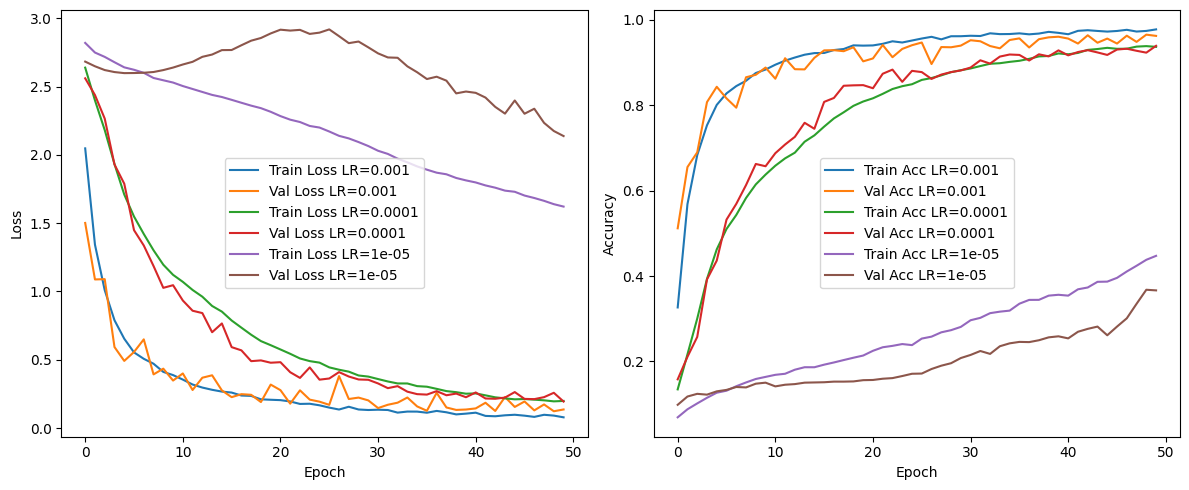

In [14]:

# Define the evaluation function
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Define the training and evaluation function
def train_and_evaluate_model(model, train_loader, val_loader, test_loader, criterion, num_epochs, lr, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)
        
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Define the learning rates to evaluate
learning_rates = [1e-3, 1e-4, 1e-5]

# Initialize the model and criterion
model = CustomEfficientNet(num_classes=15).to(device)
criterion = nn.CrossEntropyLoss()

# Loop through learning rates
results = {}
for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')
    model = CustomEfficientNet(num_classes=15).to(device)
    train_losses, val_losses, train_accuracies, val_accuracies = train_and_evaluate_model(model, train_loader, val_loader, test_loader, criterion, num_epochs=50, lr=lr, device=device)
    results[lr] = (train_losses, val_losses, train_accuracies, val_accuracies)

# Plot the results
plt.figure(figsize=(12, 5))

for lr, (train_losses, val_losses, train_accuracies, val_accuracies) in results.items():
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label=f'Train Loss LR={lr}')
    plt.plot(val_losses, label=f'Val Loss LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label=f'Train Acc LR={lr}')
    plt.plot(val_accuracies, label=f'Val Acc LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()
